In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import module
import matplotlib.colors as mcolors



In [2]:
df = pd.read_csv('booking_after_preprocess.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36280 entries, 0 to 36279
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36280 non-null  object 
 1   number_of_adults          36280 non-null  int64  
 2   number_of_children        36280 non-null  int64  
 3   number_of_weekend_nights  36280 non-null  int64  
 4   number_of_week_nights     36280 non-null  int64  
 5   type_of_meal              36280 non-null  object 
 6   car_parking_space         36280 non-null  int64  
 7   room_type                 36280 non-null  object 
 8   lead_time                 36280 non-null  int64  
 9   market_segment_type       36280 non-null  object 
 10  repeated                  36280 non-null  int64  
 11  P_C                       36280 non-null  int64  
 12  P_not_C                   36280 non-null  int64  
 13  average_price             36280 non-null  float64
 14  specia

In [4]:
df = module.df_turn_datatype_to_categorical(df,['type_of_meal', 'room_type', 'market_segment_type', 'booking_status' ])

In [5]:
df['date_of_reservation'] = pd.to_datetime(df['date_of_reservation'], format='%Y-%m-%d') 
df['date_of_arrival'] = pd.to_datetime(df['date_of_arrival'], format='%Y-%m-%d') 

In [6]:
df.describe()

,number_of_adults,number_of_children,number_of_weekend_nights,number_of_week_nights,car_parking_space,lead_time,repeated,P_C,P_not_C,average_price,...,reservation_day,reservation_month,reservation_year,date_of_arrival,arrival_day,arrival_month,arrival_year,lead_month,number_of_total_nights,number_of_total_people
count,36280.000000,36280.000000,36280.000000,36280.000000,36280.000000,36280.000000,36280.000000,36280.000000,36280.000000,36280.000000,...,36280.000000,36280.000000,36280.000000,36280,36280.000000,36280.000000,36280.000000,36280.000000,36280.000000,36280.000000
mean,1.844928,0.104520,0.807387,2.192558,0.030981,85.204631,0.025634,0.014333,0.116262,103.304300,...,15.592475,7.423319,2017.820397,2018-08-17 18:50:38.765159936,15.851847,6.812789,2018.103721,2.427012,2.999945,1.949449
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,2017.000000,2017-07-07 00:00:00,1.000000,1.000000,2017.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,...,8.000000,5.000000,2018.000000,2018-04-06 00:00:00,8.000000,3.000000,2018.000000,0.000000,2.000000,2.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,...,16.000000,8.000000,2018.000000,2018-08-26 00:00:00,16.000000,7.000000,2018.000000,1.000000,3.000000,2.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,...,23.000000,10.000000,2018.000000,2018-12-25 00:00:00,24.000000,10.000000,2018.000000,4.000000,4.000000,2.000000
max,4.000000,3.000000,5.000000,11.000000,1.000000,443.000000,1.000000,6.000000,30.000000,266.670000,...,31.000000,12.000000,2018.000000,2019-12-16 00:00:00,31.000000,12.000000,2019.000000,14.000000,16.000000,5.000000
std,0.518719,0.393715,0.861570,1.360295,0.173269,85.889460,0.158043,0.184321,1.159722,34.627003,...,8.734425,3.069824,0.383862,NaN,8.834761,3.637653,0.593354,2.821933,1.709279,0.645135


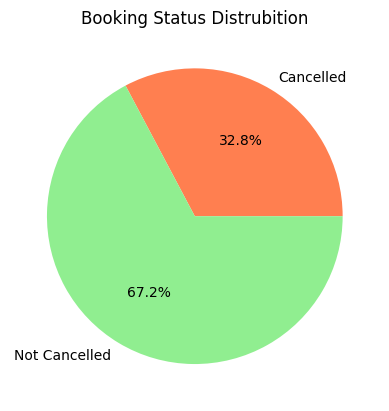

<Figure size 1200x800 with 0 Axes>

In [7]:
plt.pie(
        x=[
        df[df['booking_status'] == 'Canceled']['booking_status'].count(),
        df[df['booking_status'] == 'Not_Canceled']['booking_status'].count()],
        labels=['Cancelled', 'Not Cancelled'],
        autopct='%1.1f%%',
        colors=['coral', 'lightgreen'],
)
plt.title('Booking Status Distrubition')
plt.figure(figsize=(12, 8))
plt.show()
    

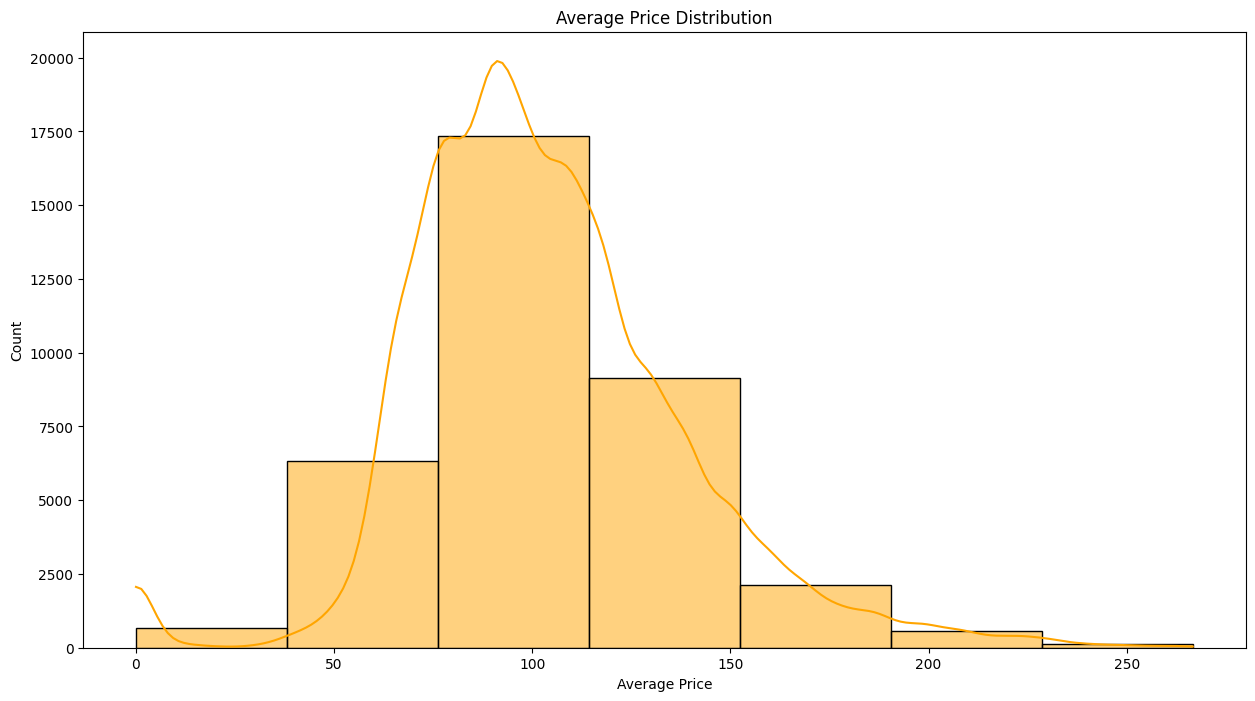

In [8]:
module.plot_hist(df,'Average Price Distribution', 'Average Price', 'average_price', 7, True, 'orange' )

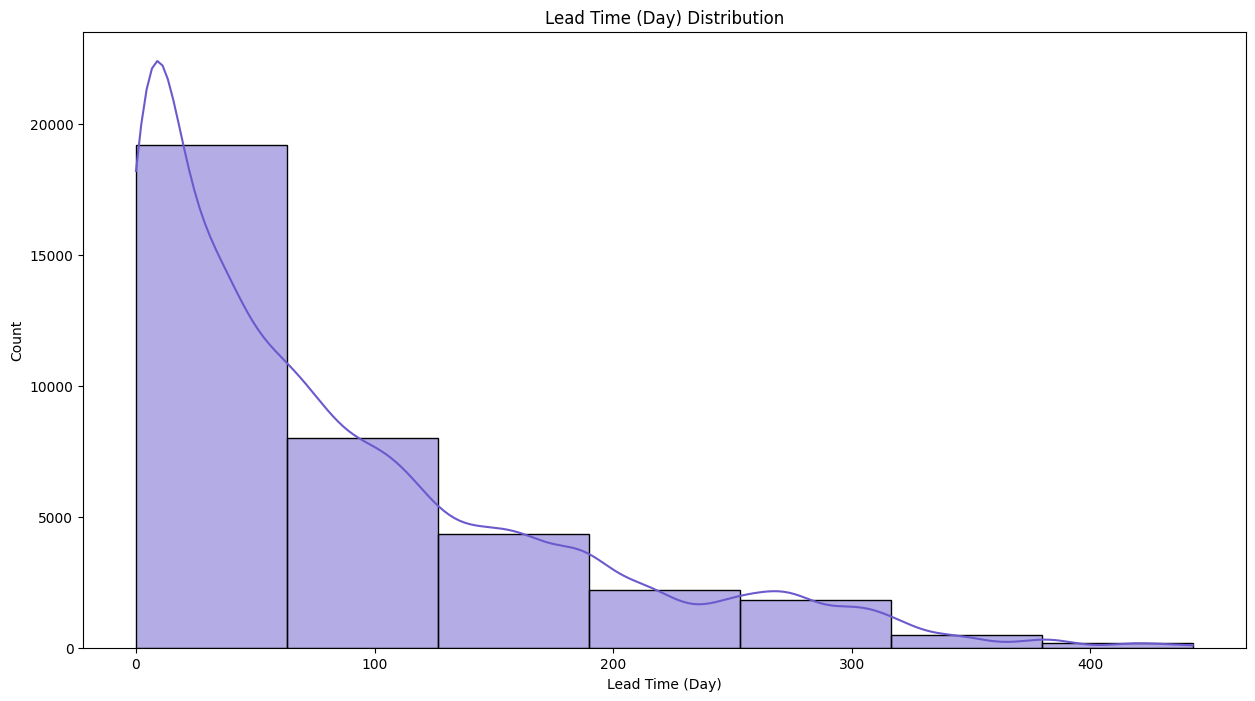

In [9]:
module.plot_hist(df,'Lead Time (Day) Distribution', 'Lead Time (Day)', 'lead_time', 7, True, 'slateblue' )

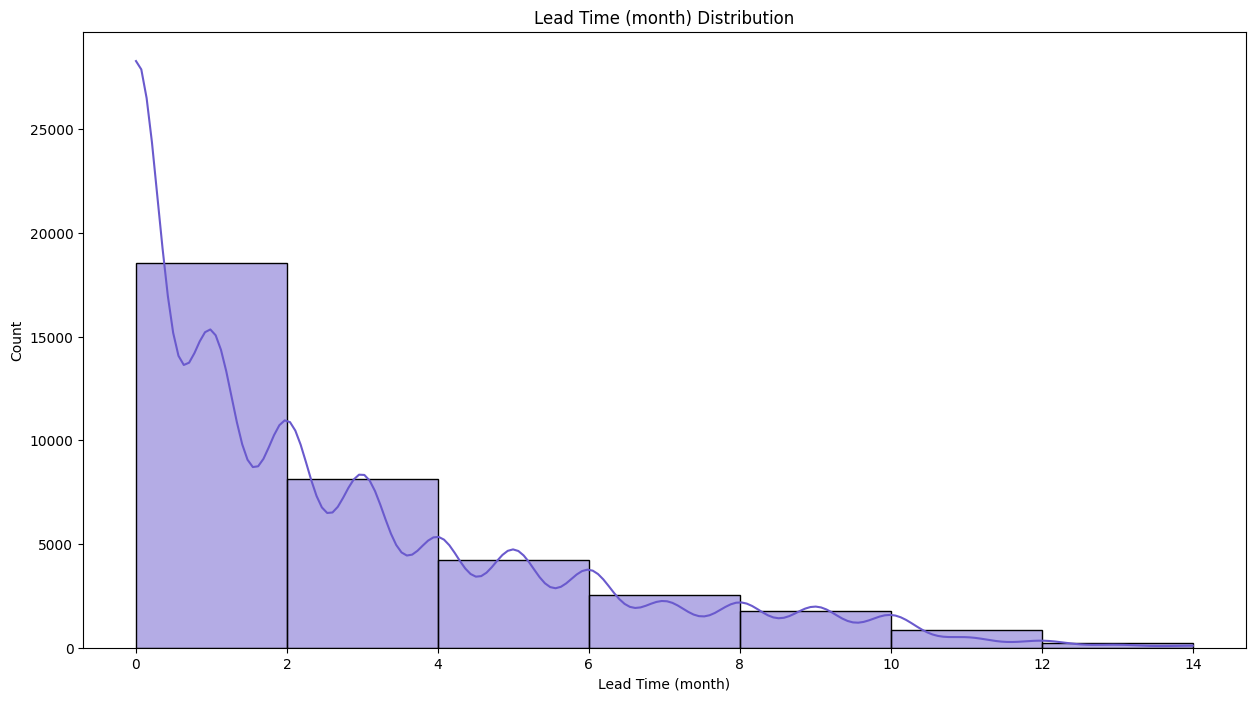

In [10]:
module.plot_hist(df,'Lead Time (month) Distribution', 'Lead Time (month)', 'lead_month', 7, True, 'slateblue' )

array([[<Axes: title={'center': 'number_of_adults'}>,
        <Axes: title={'center': 'number_of_children'}>],
       [<Axes: title={'center': 'number_of_total_people'}>, <Axes: >]],
      dtype=object)

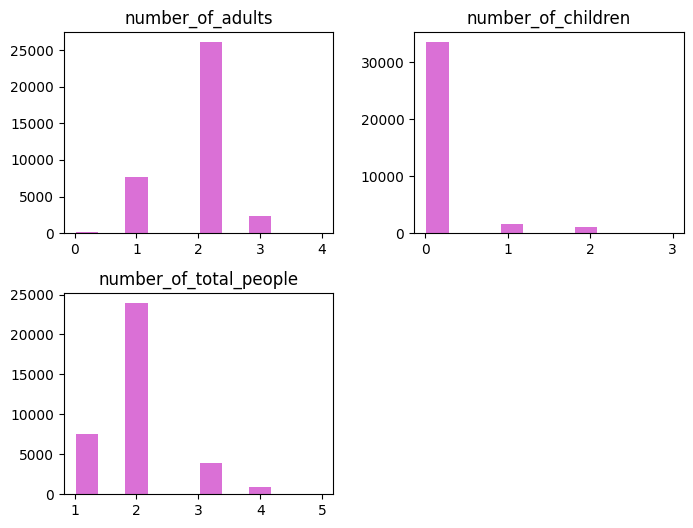

In [11]:
viz = df[['number_of_adults', 'number_of_children','number_of_total_people']]
viz.hist(color ='orchid',grid=False, figsize=(8,6), zorder=2, rwidth=0.9)


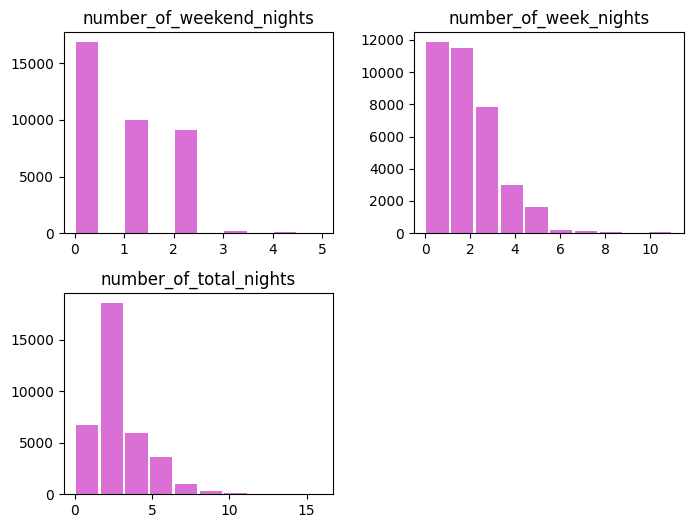

In [12]:
viz = df[['number_of_weekend_nights', 'number_of_week_nights','number_of_total_nights']]
viz.hist(color ='orchid',grid=False, figsize=(8,6), zorder=2, rwidth=0.9)
plt.show()

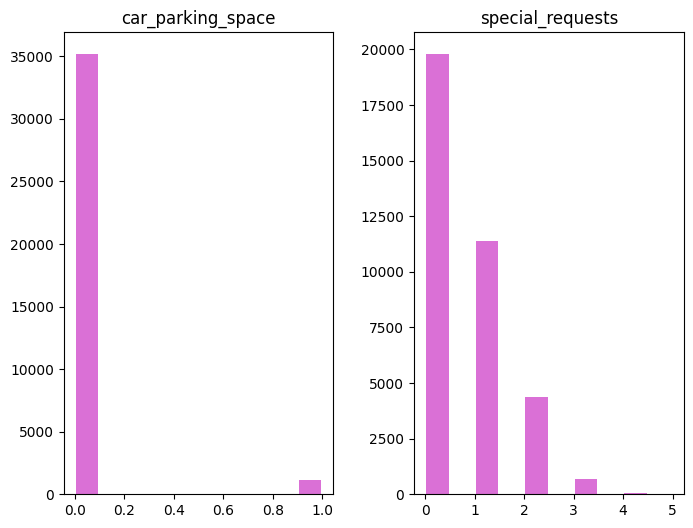

In [13]:
viz = df[['type_of_meal','car_parking_space', 'room_type','market_segment_type', 'special_requests',]]
viz.hist(color ='orchid',grid=False, figsize=(8,6), zorder=2, rwidth=0.9)
plt.show()

In [14]:
df.groupby(by='type_of_meal',observed=True)['type_of_meal'].count().to_frame()

,type_of_meal
type_of_meal,
Meal Plan 1,27838
Meal Plan 2,3305
Meal Plan 3,5
Not Selected,5132


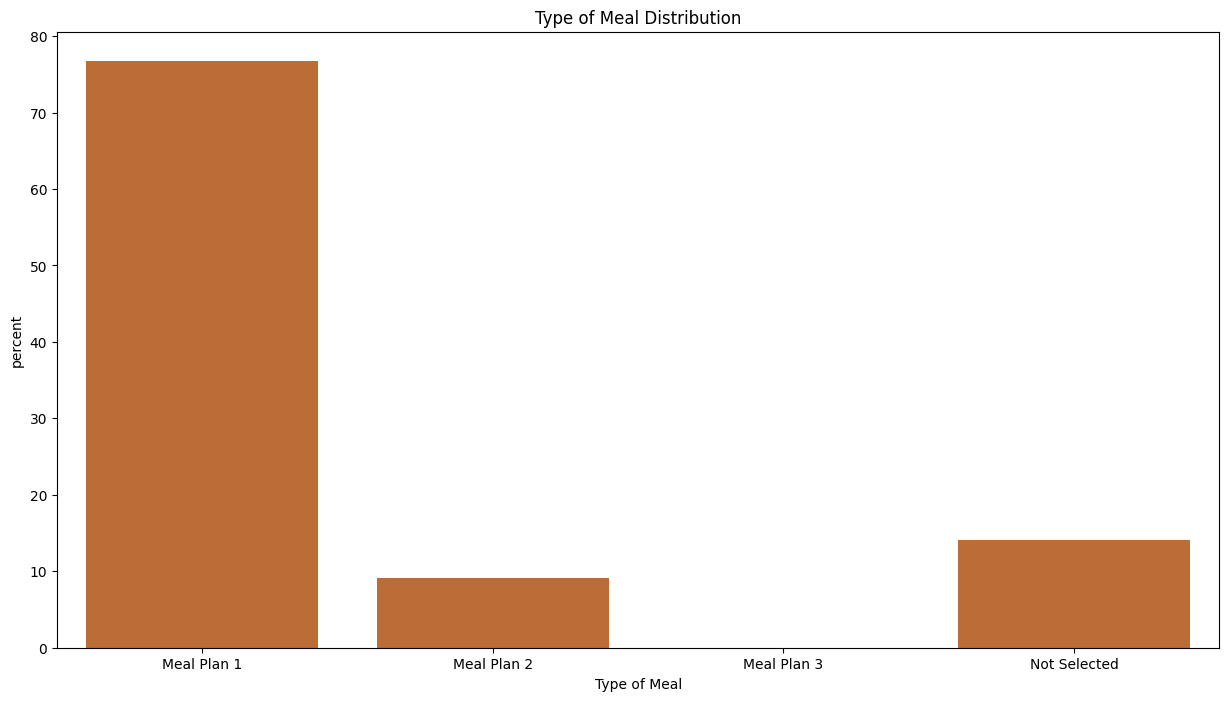

In [15]:
module.plot_count(df['type_of_meal'],'Type of Meal Distribution' , 'Type of Meal','chocolate')

In [16]:
df['arrival_month'] = df['date_of_arrival'].dt.month_name()
df['reservation_month'] = df['date_of_reservation'].dt.month_name()


In [17]:
df.groupby(['arrival_year'])['booking_status'].count()

arrival_year
2017     4700
2018    23117
2019     8463
Name: booking_status, dtype: int64

In [18]:
df.groupby(['reservation_year'])['booking_status'].count()

reservation_year
2017     6516
2018    29764
Name: booking_status, dtype: int64

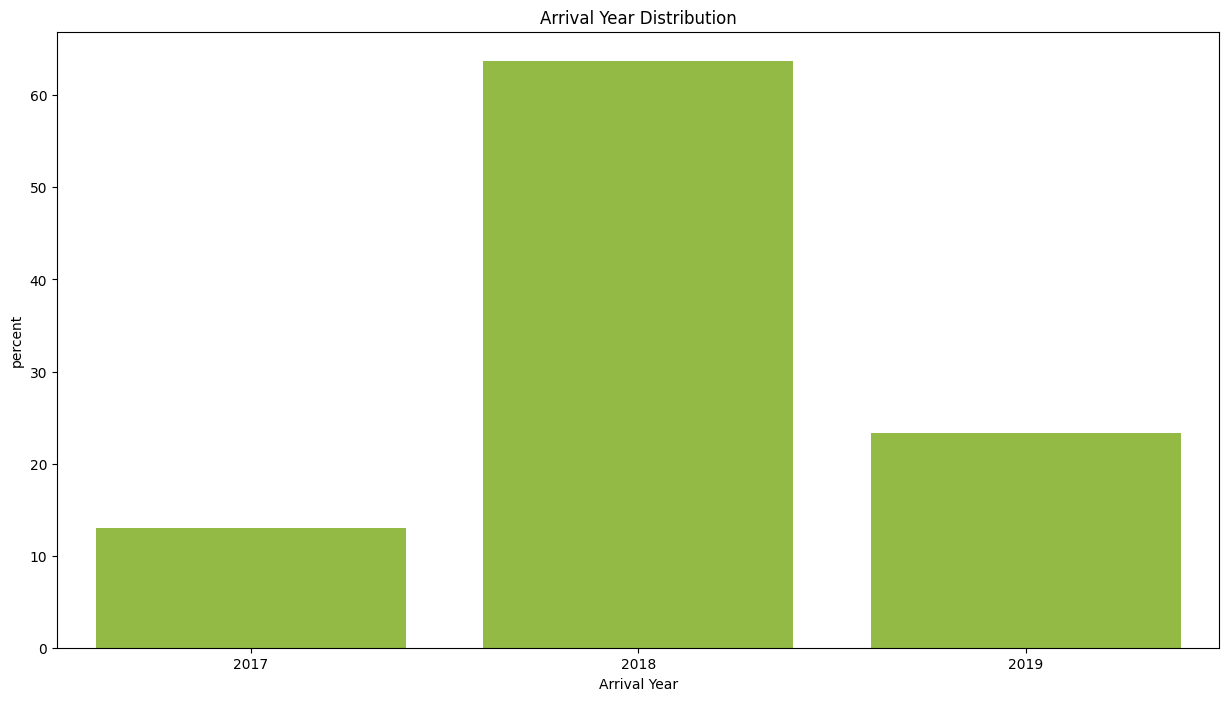

In [19]:
module.plot_count(df['arrival_year'],'Arrival Year Distribution' , 'Arrival Year','yellowgreen')

In [20]:
df.arrival_month.unique()

array(['November', 'March', 'December', 'May', 'September', 'June',
       'February', 'October', 'August', 'January', 'July', 'April'],
      dtype=object)

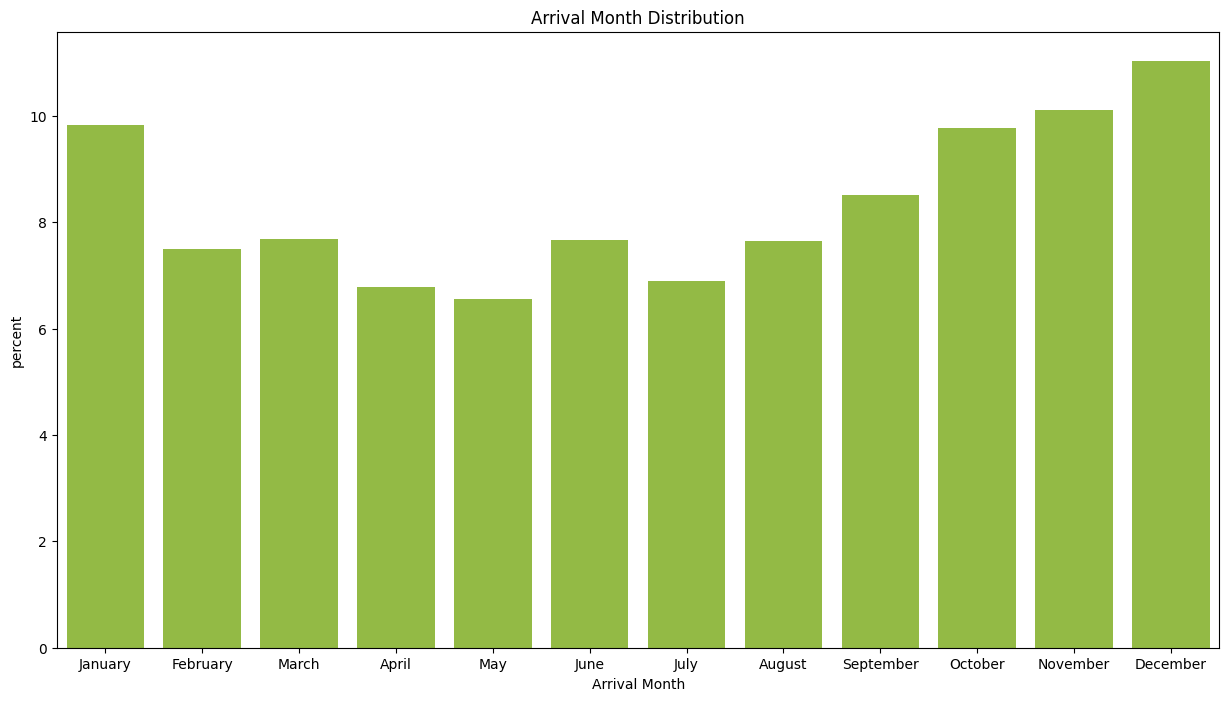

In [21]:
module.plot_count(df['arrival_month'],'Arrival Month Distribution' ,'Arrival Month','yellowgreen',order =['January','February','March','April','May','June','July','August','September','October','November','December'])

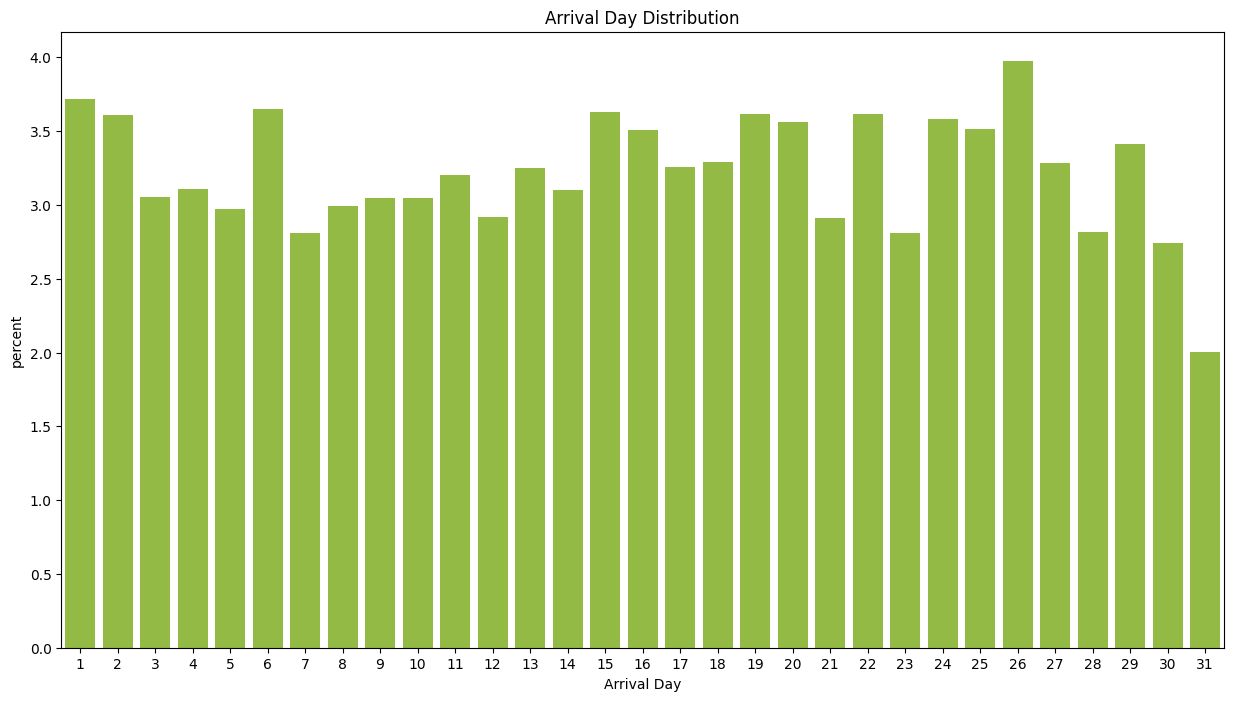

In [22]:
module.plot_count(df['arrival_day'],'Arrival Day Distribution' , 'Arrival Day','yellowgreen')

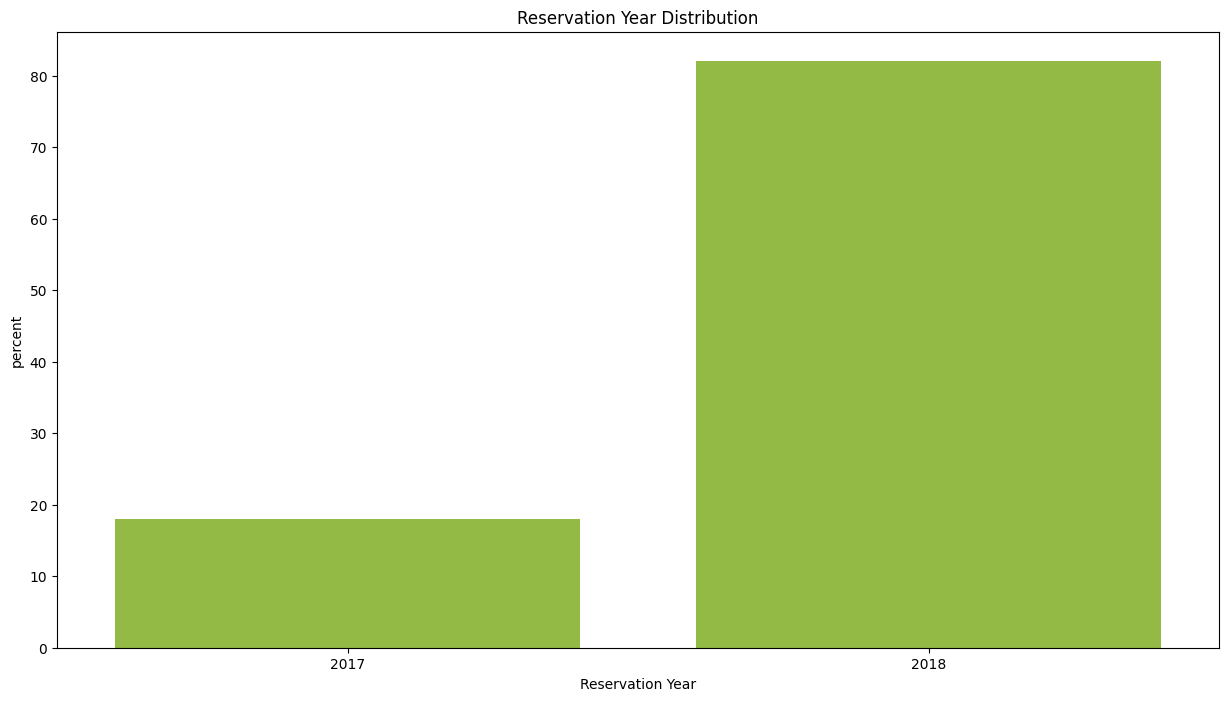

In [23]:
module.plot_count(df['reservation_year'],'Reservation Year Distribution' , 'Reservation Year','yellowgreen')

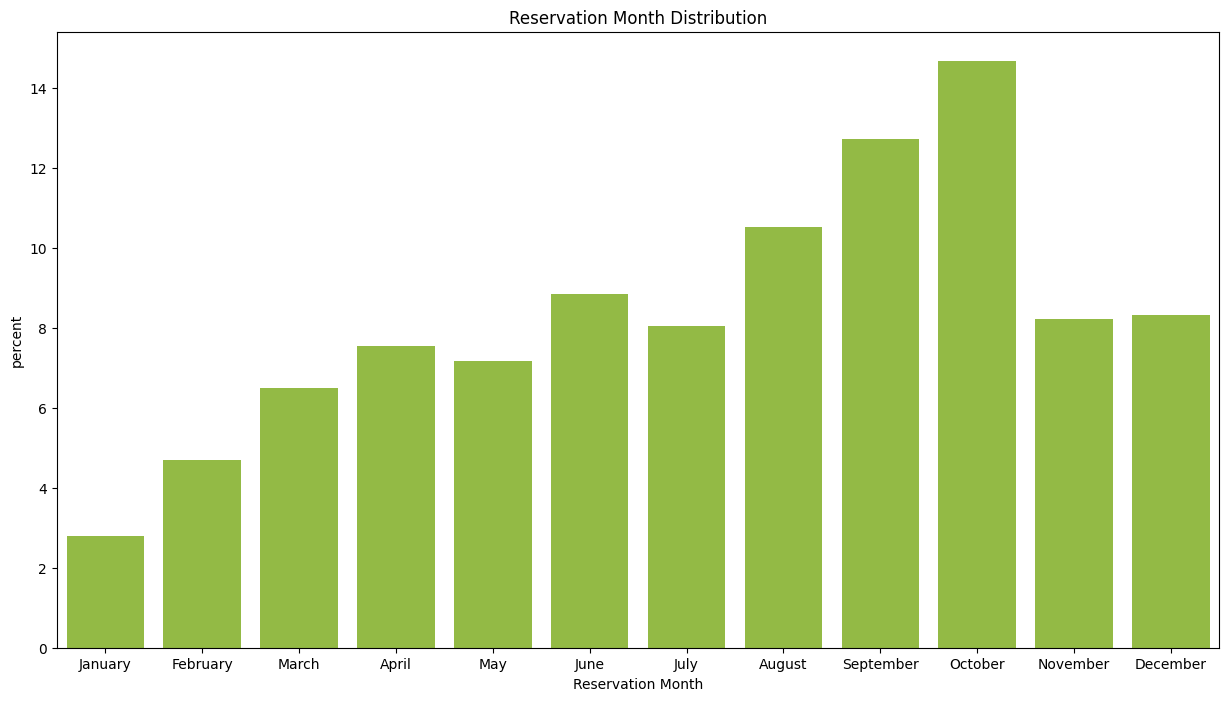

In [24]:
module.plot_count(df['reservation_month'],'Reservation Month Distribution' , 'Reservation Month','yellowgreen',['January','February','March','April','May','June','July','August','September','October','November','December'])

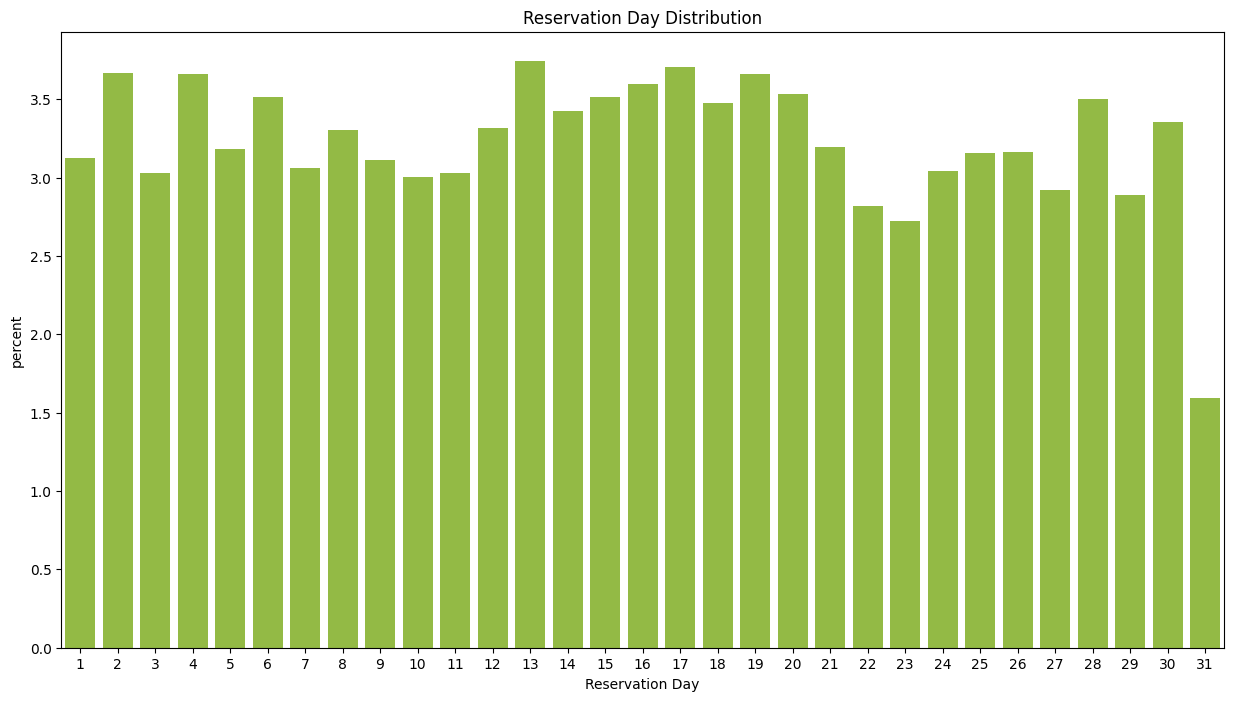

In [25]:
module.plot_count(df['reservation_day'],'Reservation Day Distribution' , 'Reservation Day','yellowgreen')

In [26]:
df.groupby('reservation_month')['lead_month'].mean()

reservation_month
April        2.051516
August       2.810386
December     2.066578
February     0.677419
January      0.865878
July         3.439575
June         2.910084
March        1.172604
May          2.410543
November     2.002348
October      3.038917
September    2.801561
Name: lead_month, dtype: float64

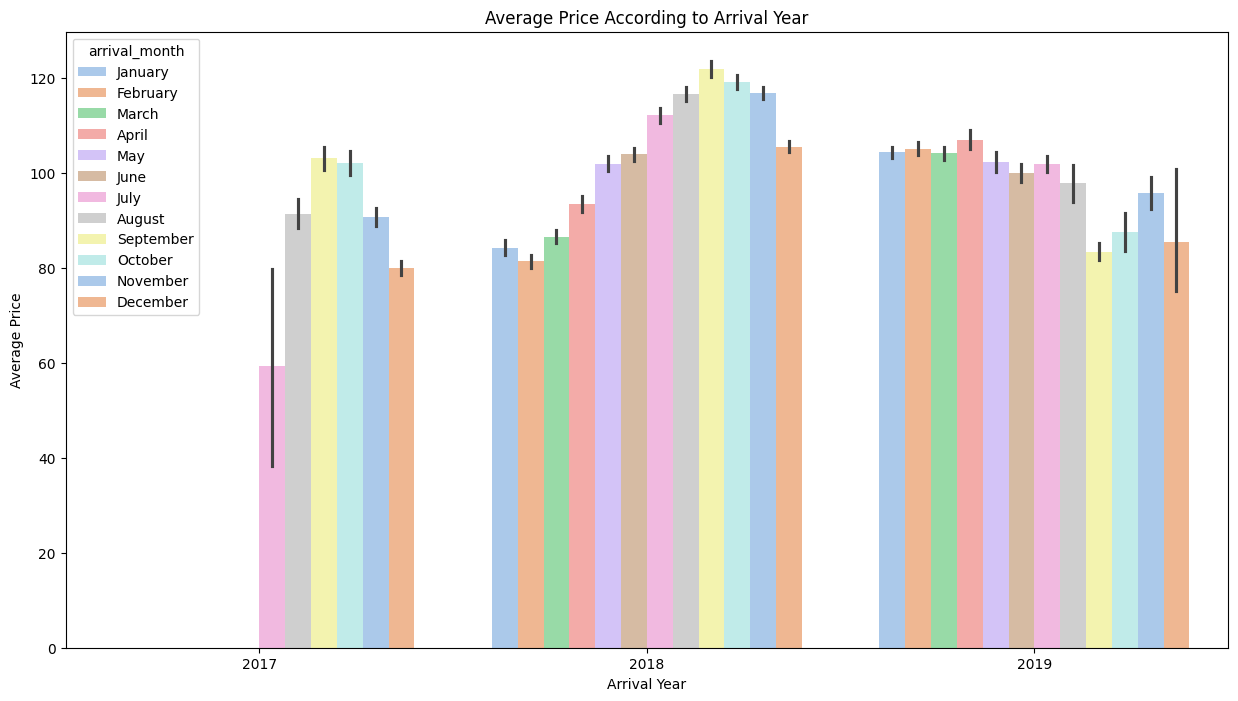

In [27]:
module.plot_bar(
        df,
        "arrival_year",
        "average_price",
        "Average Price According to Arrival Year",
        "Arrival Year",
        "Average Price",
        hue="arrival_month",
        hue_order=['January','February','March','April','May','June','July','August','September','October','November','December']
        )

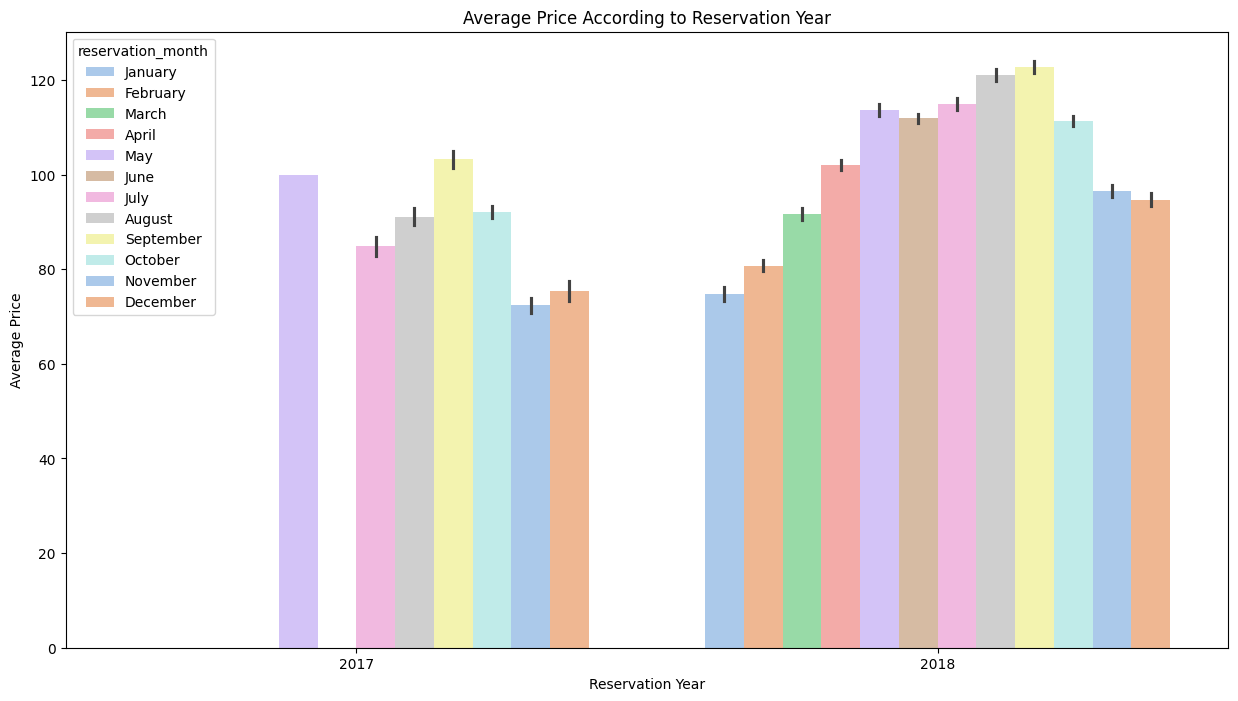

In [28]:
module.plot_bar(
        df,
        "reservation_year",
        "average_price",
        "Average Price According to Reservation Year",
        "Reservation Year",
        "Average Price",
        hue="reservation_month",
        hue_order=['January','February','March','April','May','June','July','August','September','October','November','December']
        )

In [29]:
df.query('arrival_year==2019').groupby('booking_status',observed=True)['booking_status'].count()

booking_status
Canceled        5092
Not_Canceled    3371
Name: booking_status, dtype: int64

In [30]:
df.query('arrival_year==2018').groupby('booking_status',observed=True)['booking_status'].count()

booking_status
Canceled         6310
Not_Canceled    16807
Name: booking_status, dtype: int64

<Axes: xlabel='date_of_reservation', ylabel='average_price'>

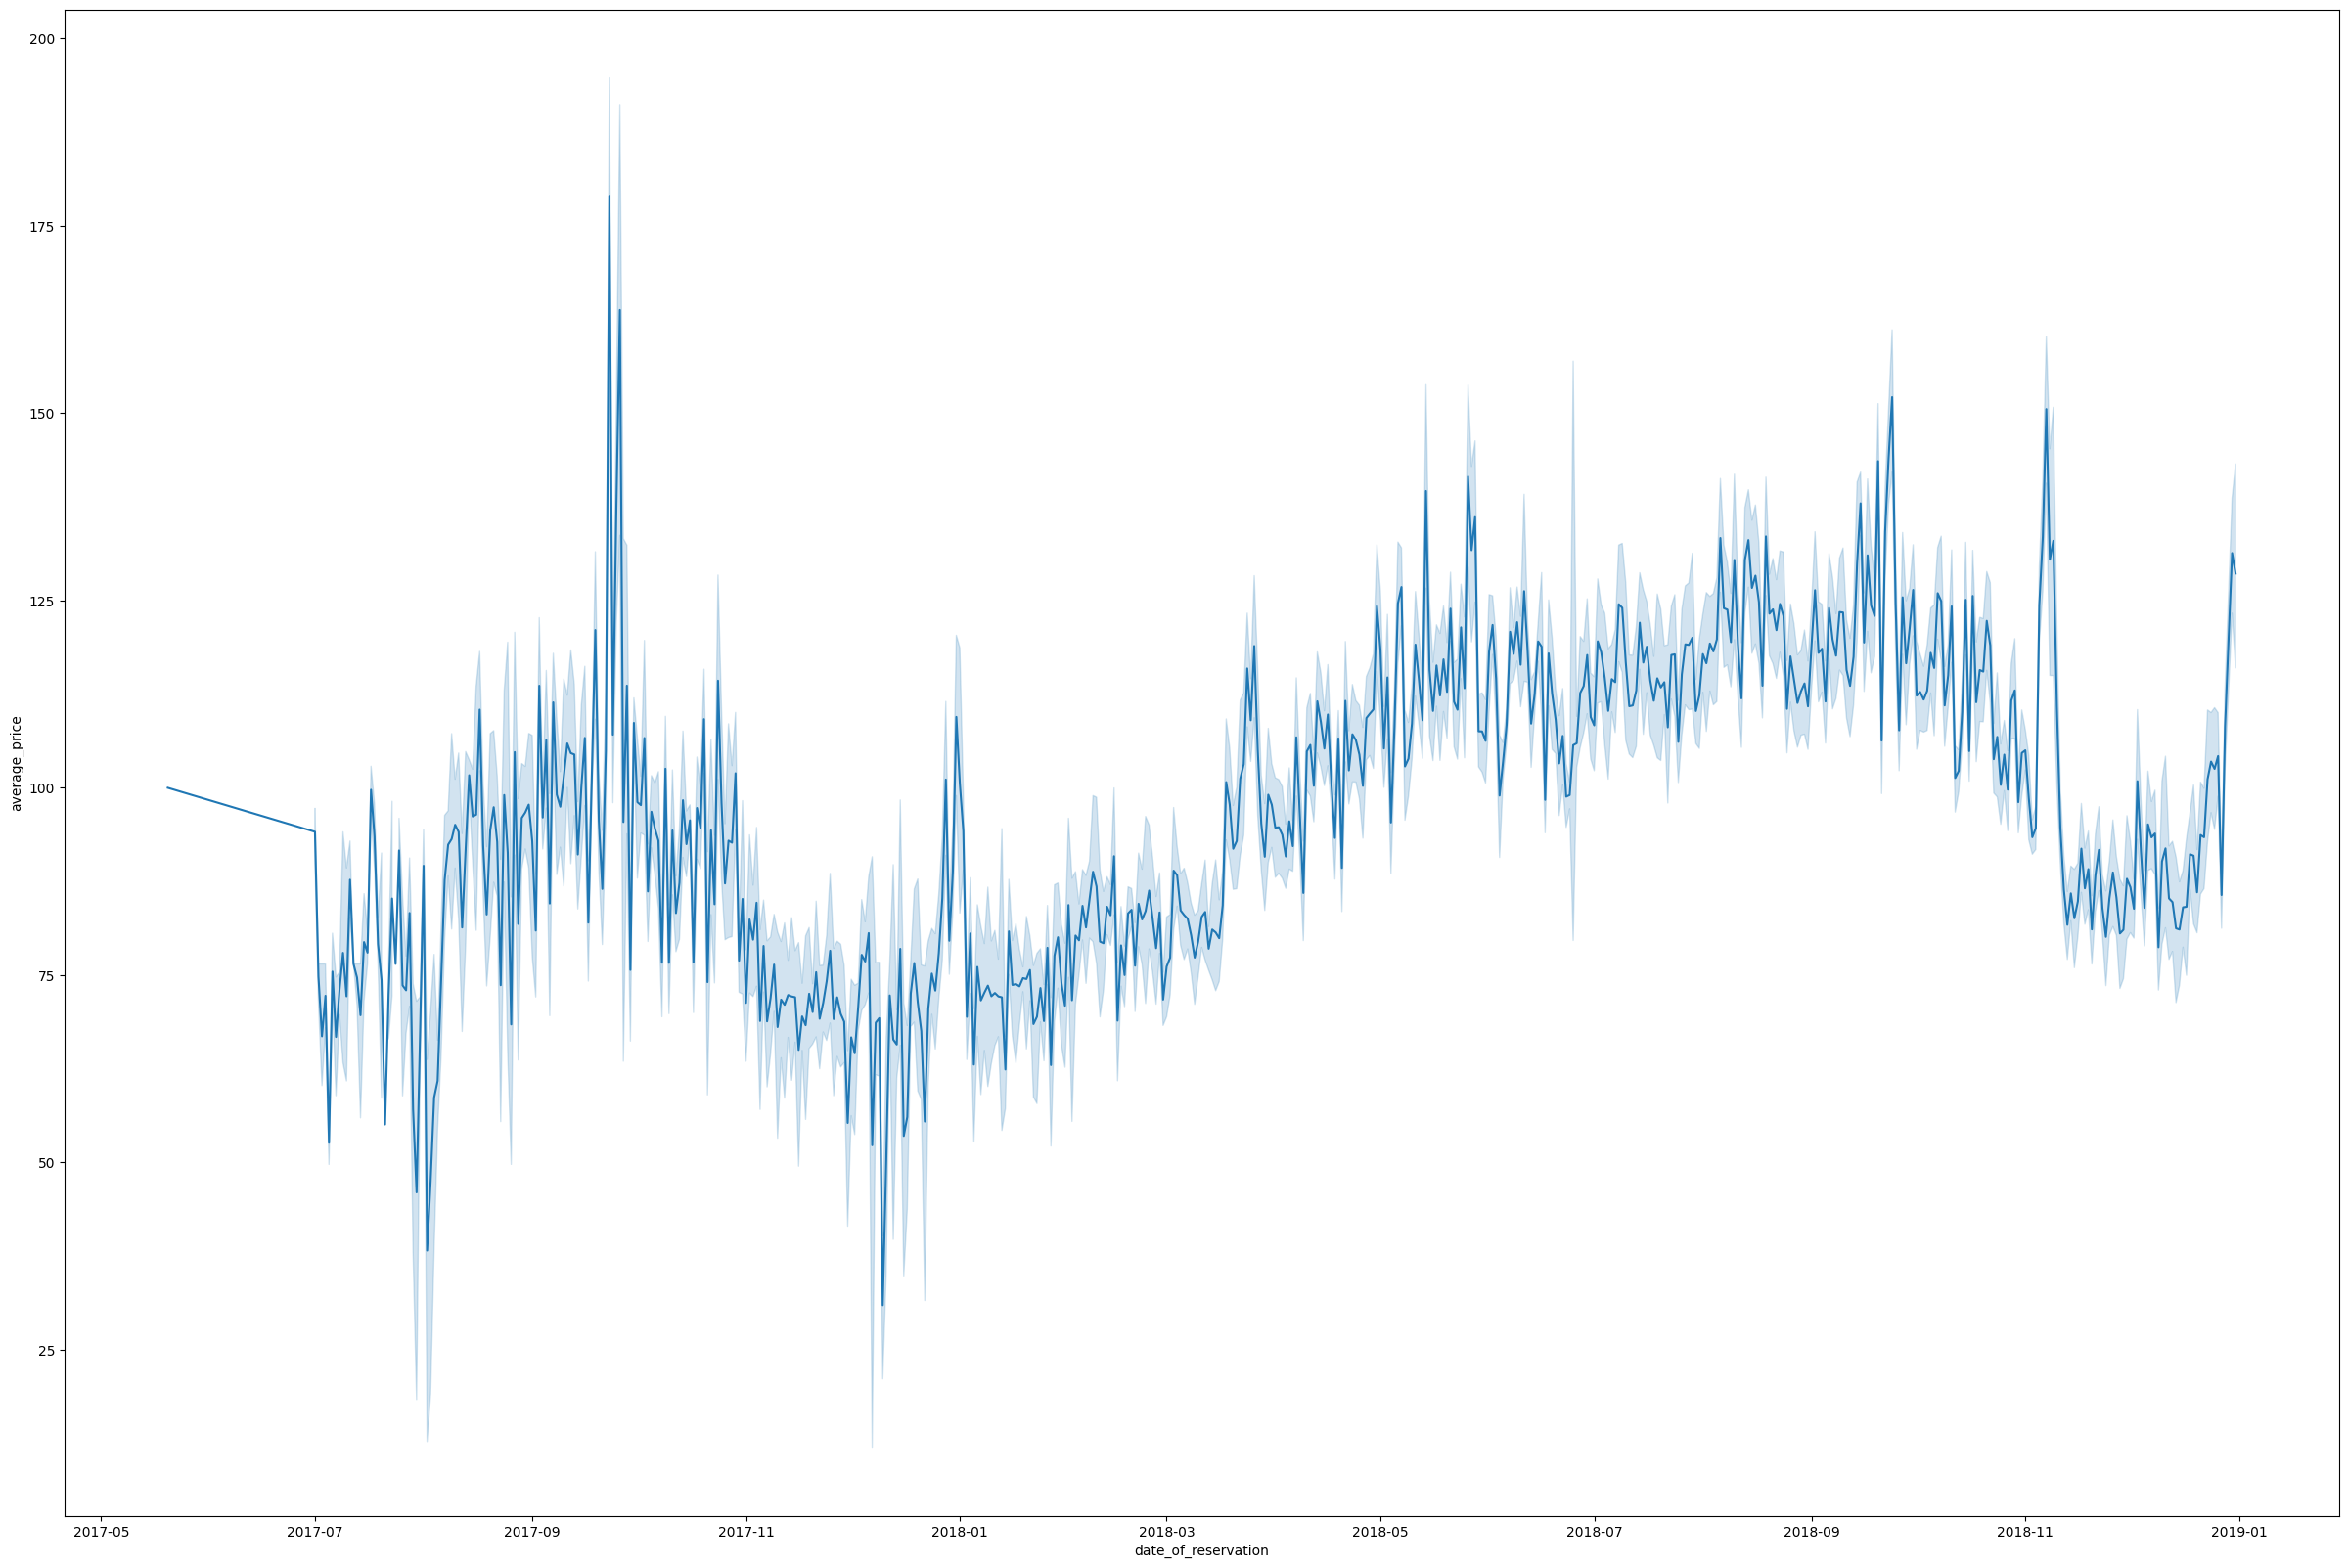

In [31]:
plt.figure(figsize=(30,20))
sns.lineplot(data=df, x="date_of_reservation", y="average_price")


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36280 entries, 0 to 36279
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Booking_ID                36280 non-null  object        
 1   number_of_adults          36280 non-null  int64         
 2   number_of_children        36280 non-null  int64         
 3   number_of_weekend_nights  36280 non-null  int64         
 4   number_of_week_nights     36280 non-null  int64         
 5   type_of_meal              36280 non-null  category      
 6   car_parking_space         36280 non-null  int64         
 7   room_type                 36280 non-null  category      
 8   lead_time                 36280 non-null  int64         
 9   market_segment_type       36280 non-null  category      
 10  repeated                  36280 non-null  int64         
 11  P_C                       36280 non-null  int64         
 12  P_not_C           

### Encode Categorical Variables
- booking status
- type of meal
- room type
- market_segment_type 

In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
df['booking_status'].unique()


['Not_Canceled', 'Canceled']
Categories (2, object): ['Canceled', 'Not_Canceled']

In [35]:
le = LabelEncoder()
train = ['Canceled', 'Not_Canceled']
df['booking_status'] = le.fit(train).transform(df['booking_status'])

In [36]:
def encode_categorical_variable(categorical_data):
    le = LabelEncoder()
    train = categorical_data.unique()
    return le.fit(train).transform(categorical_data)


In [37]:
df['room_type'] = encode_categorical_variable(df['room_type'])
df['market_segment_type'] = encode_categorical_variable(df['market_segment_type'])
df['type_of_meal'] = encode_categorical_variable(df['type_of_meal'])

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36280 entries, 0 to 36279
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Booking_ID                36280 non-null  object        
 1   number_of_adults          36280 non-null  int64         
 2   number_of_children        36280 non-null  int64         
 3   number_of_weekend_nights  36280 non-null  int64         
 4   number_of_week_nights     36280 non-null  int64         
 5   type_of_meal              36280 non-null  int32         
 6   car_parking_space         36280 non-null  int64         
 7   room_type                 36280 non-null  int32         
 8   lead_time                 36280 non-null  int64         
 9   market_segment_type       36280 non-null  int32         
 10  repeated                  36280 non-null  int64         
 11  P_C                       36280 non-null  int64         
 12  P_not_C           

In [39]:
df.columns

Index(['Booking_ID', 'number_of_adults', 'number_of_children',
       'number_of_weekend_nights', 'number_of_week_nights', 'type_of_meal',
       'car_parking_space', 'room_type', 'lead_time', 'market_segment_type',
       'repeated', 'P_C', 'P_not_C', 'average_price', 'special_requests',
       'date_of_reservation', 'booking_status', 'reservation_day',
       'reservation_month', 'reservation_year', 'date_of_arrival',
       'arrival_day', 'arrival_month', 'arrival_year', 'lead_month',
       'number_of_total_nights', 'number_of_total_people'],
      dtype='object')

In [40]:
df['arrival_month'] = df['date_of_arrival'].dt.month
df['reservation_month'] = df['date_of_reservation'].dt.month


### CORELATION

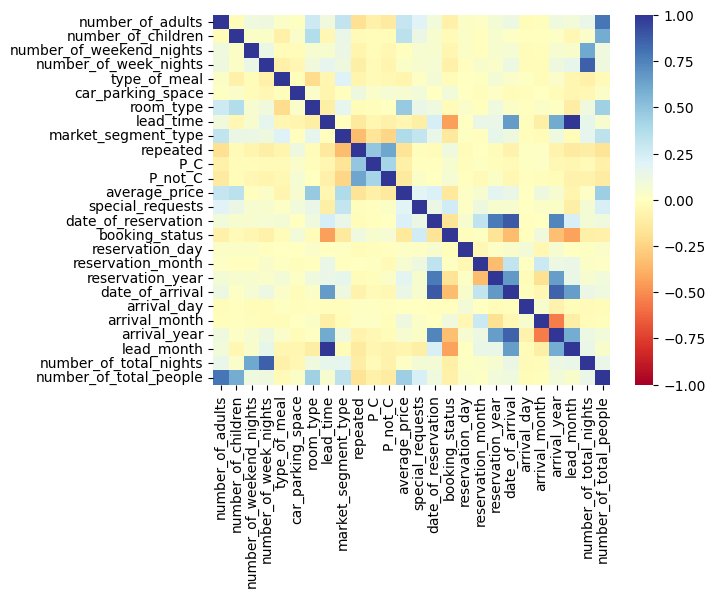

In [41]:
module.corr_heatmap(df,['number_of_adults', 'number_of_children',
       'number_of_weekend_nights', 'number_of_week_nights', 'type_of_meal',
       'car_parking_space', 'room_type', 'lead_time', 'market_segment_type',
       'repeated', 'P_C', 'P_not_C', 'average_price', 'special_requests',
       'date_of_reservation', 'booking_status', 'reservation_day',
       'reservation_month', 'reservation_year', 'date_of_arrival',
       'arrival_day', 'arrival_month', 'arrival_year', 'lead_month',
       'number_of_total_nights', 'number_of_total_people'])